# General Machine Learning Experiment

Machine learning can be a complicated task. Luckily, many common functions have already been abstracted and made in to useful libraries by our predecessors! Let's make use of them by importing the required packages! If you get any errors, make sure to install the package in your (virtual) environment by either running `pip install [package_name]` or using another package manager.

In [1]:
import numpy as np
import sys
import time
import matplotlib
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

This function generates a toy dataset. This is the 'target function' you will be trying to develop a machine learning model to emulate today.

In [2]:
def spiraldata(N=300):
    r = np.linspace(1,2*np.pi,N)
    xTr1 = np.array([np.sin(2.*r)*r, np.cos(2*r)*r]).T
    xTr2 = np.array([np.sin(2.*r+np.pi)*r, np.cos(2*r+np.pi)*r]).T
    xTr = np.concatenate([xTr1, xTr2], axis=0)
    yTr = np.concatenate([np.ones(N), -1 * np.ones(N)])
    xTr = xTr + np.random.randn(xTr.shape[0], xTr.shape[1])*0.2
    
    return xTr,yTr

### Step 1) Preliminary data analysis
The following cell will help you visualize what the dataset looks like. What observations can we make about it? 

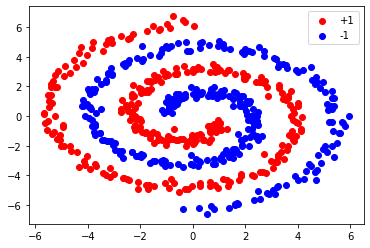

In [3]:
# Data generation
ndata = 300
Xs,ys =spiraldata(ndata)
plt.scatter(Xs[ys == 1, 0], Xs[ys == 1, 1], c='r')
plt.scatter(Xs[ys != 1, 0], Xs[ys != 1, 1], c='b')
plt.legend(["+1","-1"])
plt.show()

### Step 1.5) Data Preprocessing

The technique used here is a type of feature engineering that will make this dataset discernable to a linear classifier. I have provided this because it was what worked for the hypothesis class I have suggested later. Feel free to poke around, change the pre-processing method, or even delete it all together.

In [4]:
# Pre-processing
new_feature_ratio = ndata;

def relu(Y): return np.maximum(Y, 0)

K = np.random.randn(Xs.shape[1], Xs.shape[1]*new_feature_ratio)
b = np.random.randn(Xs.shape[1]*new_feature_ratio)

NXs = relu(np.matmul(Xs,K) + b)

This plot will provide some insight at what the pre-processing step did to the dataset. It's pretty hard to envision because the transformation done above is effectively a multi-dimensional extrusion of the data such that there exists some hyperplane separator to separate blue and red examples. Nevertheless, the projection of the higher-dimension extrusion transformation already shows a 'simpler' structure in the data.

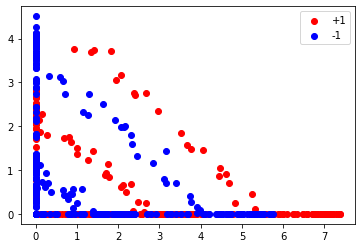

In [5]:
plt.scatter(NXs[ys == 1, 0], NXs[ys == 1, 1], c='r')
plt.scatter(NXs[ys != 1, 0], NXs[ys != 1, 1], c='b')
plt.legend(["+1","-1"])
plt.show()

### Step 2) Train-validate-test split
In the next cell, shuffle and split your dataset into a training set and a testing set. Don't worry too much about a validation set for now. Although it is best practice to use the validation set for hyperparameter tuning later, this dataset is so primitive that such a practice is overkill. Suggested train-test splits are 70-80% training, 20-30% testing.

In [6]:
# Train-validate-test split

# Shuffle your dataset using a permutation: np.random.permutation(parameters)
# Use splice notation to create your training and testing datasets.

xTr, xTe, yTr, yTe = train_test_split(NXs, ys, test_size=0.25, random_state=42)

### Step 3) Hypothesis class selection

As a hint for your success for this mini-project, I suggest that you consider the hypothesis class of kernelized support vector machines. The details of how this hypothesis class works is not important besides that it is a linear model, that is, it is really really good at separating linear data. But you might say... our dataset is clearly not linearly separable. 

### Step 4) Hyperparameter tuning
That's where the kernel hyperparameter comes in. Try using the polynomial kernel, `poly`, or the radial basis function kernel, `rbf`, to make this linear classifier mathemagically work for nonlinear datasets. The other hyperparameters for a SVM is `C` which, in brief, controls how much overfitting you allow (higher C corresponds to allowing more overfitting). `gamma` is a hyperparameter that controls the distance a certain data point has influence over the decision boundary in the `rbf` kernel. `degree` controls the degree of the polynomial decision boundary used in the `poly` kernel. `max_iter` sets a maximum number of iterations. SVMs are trained iteratively, and we need to set a maximum so it doesn't just train forever. 

In [7]:
# Suggested hypothesis class: Support Vector Machines

# Example usage:
# model = svm.SVC(parameters)
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# Suggested hyperparameter settings:
# kernel = ['linear', 'poly', 'rbf']
# C = [0.01, 0.1, 1.0, 10, 100, 100]
# gamma = [0.001, 0.01, 0.1, 1.0, 10, 100]
# max_iter = [100, 500, 1000]

# Training function: model.fit(examples, labels)

model = svm.SVC(kernel='rbf', C=100, gamma='scale',max_iter=1000)
model.fit(xTr, yTr)

/home/zander/everything/projects/ProjectX-2021/tweet-legitimacy-classifier/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=100, max_iter=1000)

### Step 5) Evaluate your model

A common evaluation metric for a model is it's accuracy on the validation/testing set. Here is the mathematical formula for accuracy:

$$accuracy = \frac{\text{# correct predictions}}{\text{# incorrect predictions}}$$

Try implementing this on your own and calculate and print the accuracy of your model on the test set.

In [8]:
from sklearn.metrics import accuracy_score
ypreds = model.predict(xTe)
accp = accuracy_score(ypreds, yTe) * 100
print(f'Your model\'s accuracy is {accp:.2f}%')

Your model's accuracy is 100.00%


We also provide some code to visualize the decision boundary of your model. This should give a sense of how good it is at discerning between the blue and red examples in the spiral dataset.

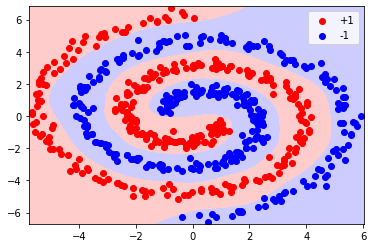

In [9]:
# Let's visualize the decision boundary of your model!
x = Xs
y = ys

xmin, xmax = x[:,0].min()-0.1, x[:,0].max()+0.1
ymin, ymax = x[:,1].min()-0.1, x[:,1].max()+0.1
xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.01), np.arange(ymin, ymax, 0.01))
xnew = np.c_[xx.ravel(), yy.ravel()]
ynew = model.predict(relu(np.matmul(xnew,K) + b)).reshape(xx.shape)

fig = plt.figure(1)
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, ynew, cmap='bwr', alpha=0.2)
plt.scatter(Xs[ys == 1, 0], Xs[ys == 1, 1], c='r')
plt.scatter(Xs[ys != 1, 0], Xs[ys != 1, 1], c='b')
plt.legend(["+1","-1"])
plt.show()


### Step 6) Results

How did your model perform? Were you able to achieve >99% accuracy? How does the decision boundary look?